In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.grid"] = True

In [9]:
df = pd.read_csv("passengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.sort_values("Month").set_index("Month")
df.rename(columns={df.columns[0]: "value"}, inplace=True)

births = pd.read_csv("births.csv")
births["Date"] = pd.to_datetime(births["Date"])
births = births.sort_values("Date").set_index("Date")
births.rename(columns={births.columns[0]: "value"}, inplace=True)

In [ ]:
x = df["value"].astype(float).to_numpy()
lags = range(1, 51)
acf_manual = []

for lag in lags:
    x1 = x[:-lag]
    x2 = x[lag:]
    corr = np.corrcoef(x1, x2)[0, 1]
    acf_manual.append(corr)

plt.plot(lags, acf_manual, marker="o")
plt.title("ACF (вручную) — passengers")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

In [ ]:
plot_acf(df["value"], lags=50)
plt.title("ACF (plot_acf) — passengers")
plt.show()

print("Сравнение: формы должны совпадать. differ: plot_acf добавляет доверительные интервалы.")

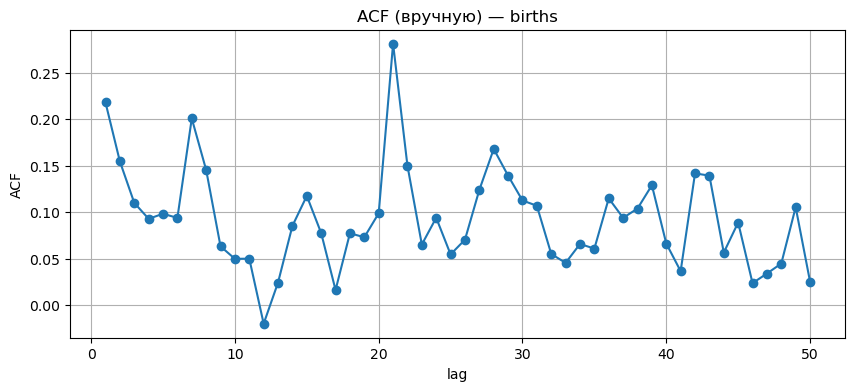

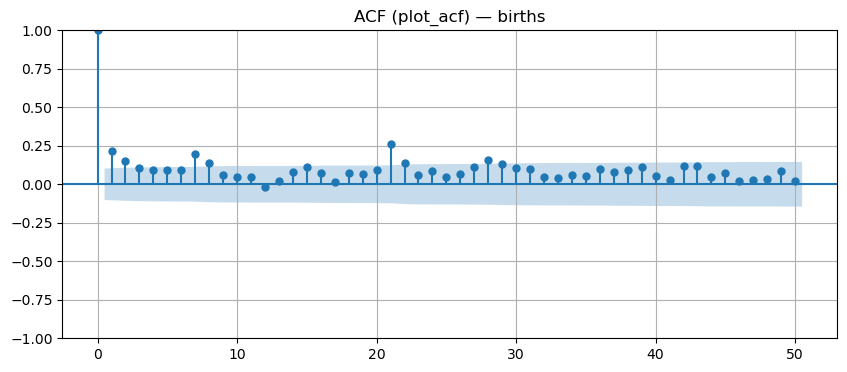

In [10]:
x2 = births["value"].astype(float).to_numpy()
    
lags = range(1, 51)
acf_manual_b = []
for lag in lags:
    a = np.corrcoef(x2[:-lag], x2[lag:])[0,1]
    acf_manual_b.append(a)

plt.plot(lags, acf_manual_b, marker="o")
plt.title("ACF (вручную) — births")
plt.xlabel("lag"); plt.ylabel("ACF")
plt.show()

plot_acf(births["value"], lags=50)
plt.title("ACF (plot_acf) — births")
plt.show()

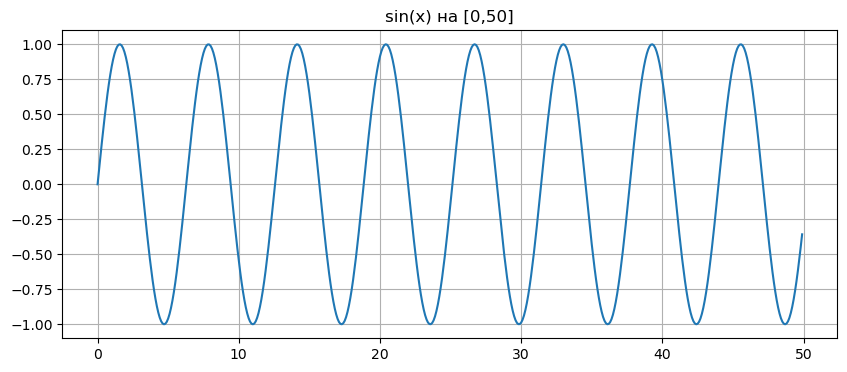

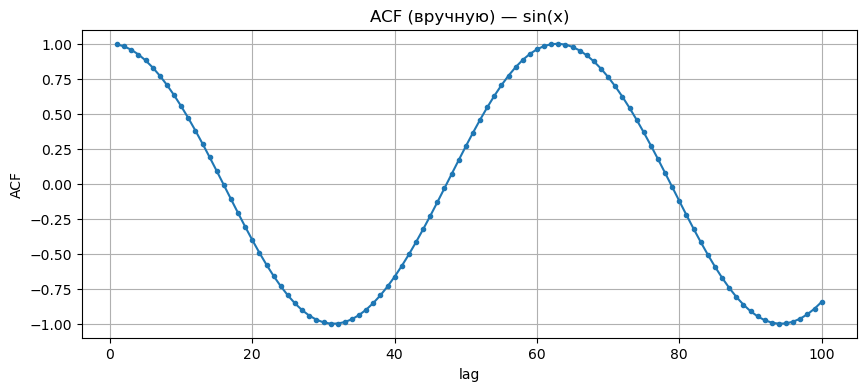

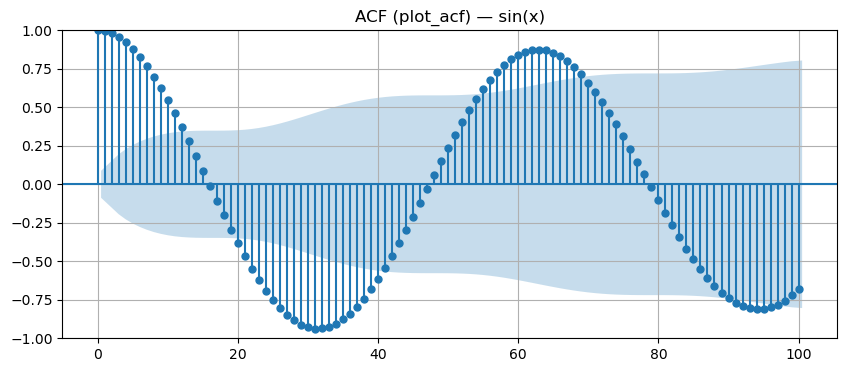

Комментарий: у sin(x) сильная периодичность → ACF колеблется синусоидально.


In [11]:
xs = np.arange(0, 50, 0.1)
ys = np.sin(xs)

plt.plot(xs, ys)
plt.title("sin(x) на [0,50]")
plt.show()

lags = range(1, 101)
acf_sin = []

for lag in lags:
    a = np.corrcoef(ys[:-lag], ys[lag:])[0,1]
    acf_sin.append(a)

plt.plot(lags, acf_sin, marker=".")
plt.title("ACF (вручную) — sin(x)")
plt.xlabel("lag"); plt.ylabel("ACF")
plt.show()

plot_acf(ys, lags=100)
plt.title("ACF (plot_acf) — sin(x)")
plt.show()

print("Комментарий: у sin(x) сильная периодичность → ACF колеблется синусоидально.")

In [12]:
res = adfuller(births["value"])
print("ADF =", res[0])
print("p-value =", res[1])
if res[1] < 0.05:
    print("→ births стационарны")
else:
    print("→ births НЕ стационарны")

ADF = -4.808291253559765
p-value = 5.2434129901498554e-05
→ births стационарны
